In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r'Mall_Customers.csv')
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


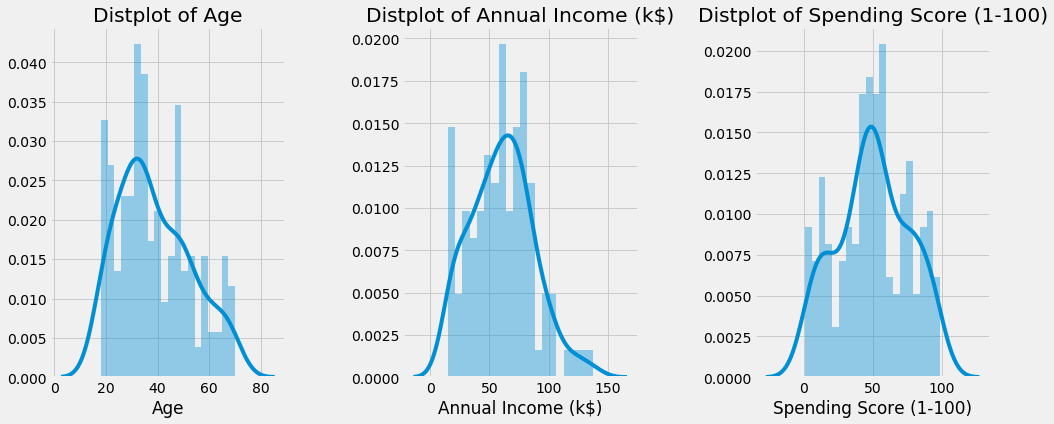

In [14]:
plt.figure(1, figsize=(15, 6))
for idx, x in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, idx+1)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

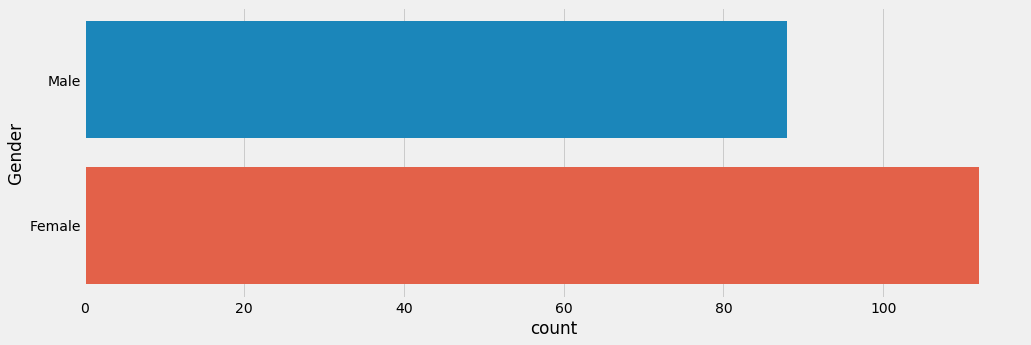

In [15]:
plt.figure(1, figsize = (15, 5))
sns.countplot(y = 'Gender', data = df)
plt.show()

In [3]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
data =(X3 - X3.min(axis=0))/ (X3.max(axis=0)-X3.min(axis=0))

In [39]:
x = np.array(X3)
y = x-x.mean(axis=0)
print(y)

[[-19.85 -45.56 -11.2 ]
 [-17.85 -45.56  30.8 ]
 [-18.85 -44.56 -44.2 ]
 [-15.85 -44.56  26.8 ]
 [ -7.85 -43.56 -10.2 ]
 [-16.85 -43.56  25.8 ]
 [ -3.85 -42.56 -44.2 ]
 [-15.85 -42.56  43.8 ]
 [ 25.15 -41.56 -47.2 ]
 [ -8.85 -41.56  21.8 ]
 [ 28.15 -41.56 -36.2 ]
 [ -3.85 -41.56  48.8 ]
 [ 19.15 -40.56 -35.2 ]
 [-14.85 -40.56  26.8 ]
 [ -1.85 -40.56 -37.2 ]
 [-16.85 -40.56  28.8 ]
 [ -3.85 -39.56 -15.2 ]
 [-18.85 -39.56  15.8 ]
 [ 13.15 -37.56 -21.2 ]
 [ -3.85 -37.56  47.8 ]
 [ -3.85 -36.56 -15.2 ]
 [-13.85 -36.56  22.8 ]
 [  7.15 -35.56 -45.2 ]
 [ -7.85 -35.56  22.8 ]
 [ 15.15 -32.56 -36.2 ]
 [ -9.85 -32.56  31.8 ]
 [  6.15 -32.56 -18.2 ]
 [ -3.85 -32.56  10.8 ]
 [  1.15 -31.56 -19.2 ]
 [-15.85 -31.56  36.8 ]
 [ 21.15 -30.56 -46.2 ]
 [-17.85 -30.56  22.8 ]
 [ 14.15 -27.56 -46.2 ]
 [-20.85 -27.56  41.8 ]
 [ 10.15 -27.56 -36.2 ]
 [-17.85 -27.56  30.8 ]
 [  3.15 -26.56 -33.2 ]
 [ -8.85 -26.56  22.8 ]
 [ -2.85 -23.56 -24.2 ]
 [-18.85 -23.56  24.8 ]
 [ 26.15 -22.56 -15.2 ]
 [-14.85 -22.56 

In [63]:
z= np.mean(np.power(y,2),axis= 0)
print(z)
gg= y/np.sqrt(z)
print(gg)

[194.1575 686.3864 663.52  ]
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]
 [-1.20926872 -1.66266033  1.00159627]
 [-0.27630176 -1.62449091 -1.71591298]
 [-1.13750203 -1.62449091  1.70038436]
 [ 1.80493225 -1.58632148 -1.83237767]
 [-0.6351352  -1.58632148  0.84631002]
 [ 2.02023231 -1.58632148 -1.4053405 ]
 [-0.27630176 -1.58632148  1.89449216]
 [ 1.37433211 -1.54815205 -1.36651894]
 [-1.06573534 -1.54815205  1.04041783]
 [-0.13276838 -1.54815205 -1.44416206]
 [-1.20926872 -1.54815205  1.11806095]
 [-0.27630176 -1.50998262 -0.59008772]
 [-1.3528021  -1.50998262  0.61338066]
 [ 0.94373197 -1.43364376 -0.82301709]
 [-0.27630176 -1.43364376  1.8556706 ]
 [-0.27630176 -1.39547433 -0.59008772]
 [-0.99396865 -1.39547433  0.88513158]
 [ 0.51313183 -1.3573049  -1.75473454]
 [-0.56336851 -1.3573049   0.88513158]
 [ 1.08726535 -1.24279661 -1.405340

In [17]:
G = []
for i in data:
    for j in data:
        if round(np.sqrt(np.sum((i-j)**2)),2) < 0.3:
            G.append(1)
        else:
            G.append(0)
X = np.array(G).reshape(200,200)
print(X)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]]


In [18]:
HN = np.sum(X,axis = 0)
HN[HN < 5] = 0
HN[HN > 0] = 1
print(HN)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [19]:
df['labels'] = HN
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color = df['labels'], 
        size= 5,
        line=dict(
            color= df['labels'],
            width= 10
        )
    )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title  = 'Age'),
        yaxis = dict(title  = 'Spending Score'),
        zaxis = dict(title  = 'Annual Income')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)